# NetworkX test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
plt.ion() #turn on matplotlib interactive mode

## Generate dummy dataframe

In [65]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(1,100,size=(100, 3)), columns=['lead_id','buyer_id','weight'])

In [66]:
df['lead_id'] = df['lead_id'].astype(str) + '_lead'
df['buyer_id'] = df['buyer_id'].astype(str) + '_buyer'

In [67]:
df

,lead_id,buyer_id,weight
0,52_lead,93_buyer,15
1,72_lead,61_buyer,21
2,83_lead,87_buyer,75
3,75_lead,88_buyer,24
4,3_lead,22_buyer,53
5,2_lead,88_buyer,30
6,38_lead,2_buyer,64
7,60_lead,21_buyer,33
8,76_lead,58_buyer,22
9,89_lead,49_buyer,91


In [68]:
G = nx.from_pandas_edgelist(df,source='lead_id',target='buyer_id',edge_attr='weight',create_using=nx.Graph())
layout = nx.spring_layout(G,k = 2, iterations=50)

In [69]:
leads = list(df['lead_id'].unique())
buyers = list(df['buyer_id'].unique())

In [70]:
from networkx.algorithms import centrality

In [71]:
dc = centrality.degree_centrality(G)
degree_c = nx.degree_centrality(G)
degree_list = [ v for v in degree_c.values() ]

In [72]:
print('max: ',max(degree_list), '\n'
      'min: ',min(degree_list))

max:  0.0390625 
min:  0.0078125


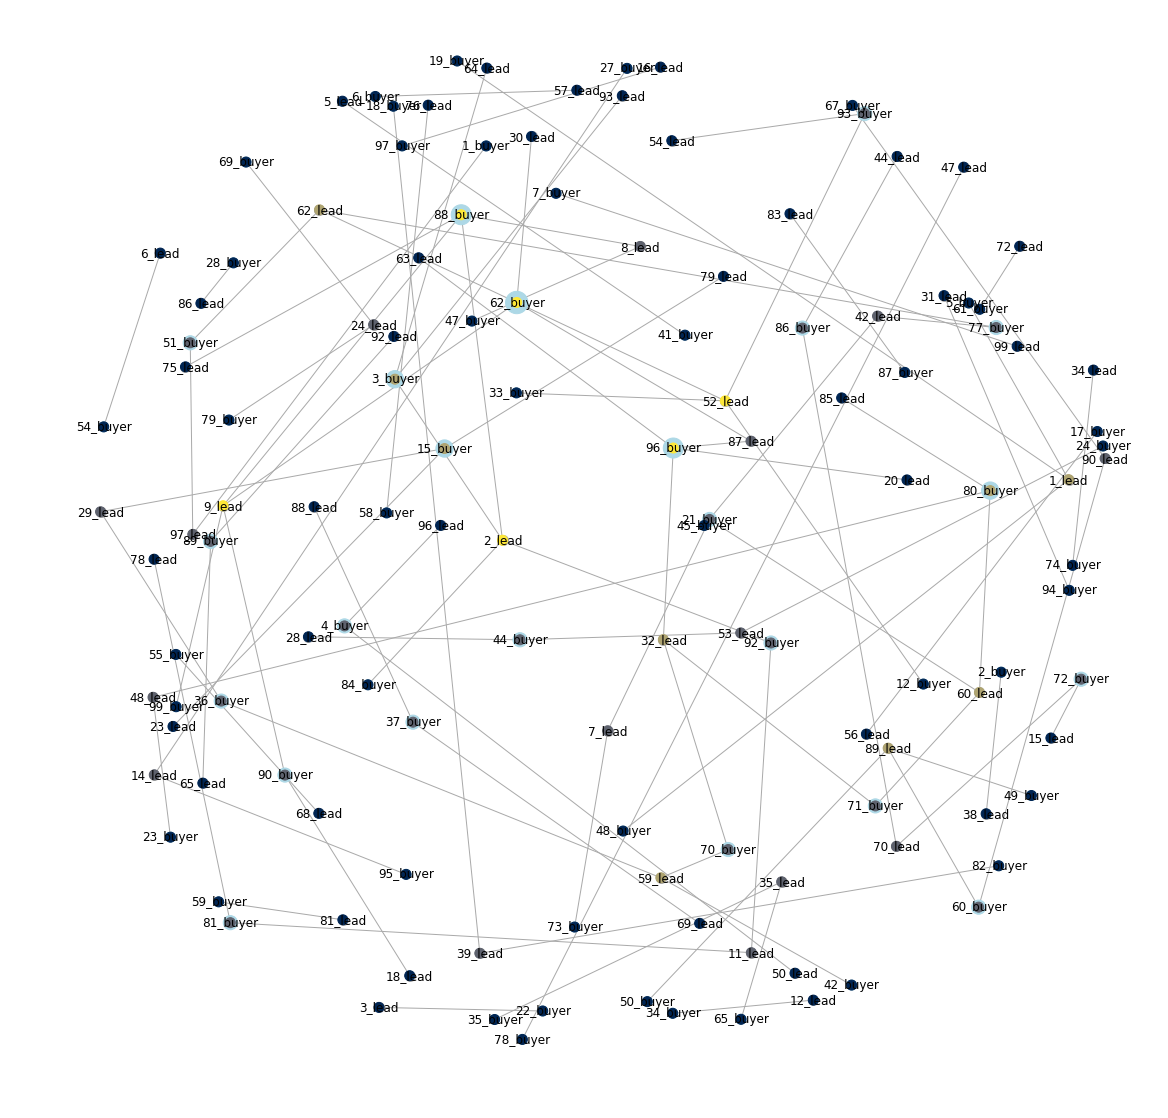

Wall time: 846 ms


In [73]:
%%time
plt.figure(figsize=(20, 20))

# 3. Draw the parts we want
nx.draw_networkx_edges(G, layout, edge_color='#AAAAAA')

buyers = [node for node in G.nodes() if node in df['buyer_id'].unique()]
size = [G.degree(node) * 100 for node in G.nodes() if node in df['buyer_id'].unique()]
nx.draw_networkx_nodes(G, layout, nodelist=buyers, node_size=size, node_color='lightblue')

leads = [node for node in G.nodes() if node in df['lead_id'].unique()]
nx.draw_networkx_nodes(G, layout, nodelist=leads, node_size=100, node_color='#AAAAAA')

nx.draw_networkx_nodes(G, layout, nodelist=degree_c.keys(), node_size=100, node_color=degree_list, cmap=plt.cm.cividis, vmax=0.03007518796992481 , vmin=0.007518796992481203)

buyers_dict = dict(zip(buyers, buyers))
nx.draw_networkx_labels(G, layout, labels=buyers_dict)

leads_dict = dict(zip(leads, leads))
nx.draw_networkx_labels(G, layout, labels=leads_dict)

plt.axis('off')

#plt.title("Revolutionary Clubs")

# 5. Tell matplotlib to show it
plt.show()

In [76]:
 G.number_of_nodes()

129

In [75]:
G.add_node('7_lead')